In [2]:
from sklearn.decomposition import PCA
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.decomposition import IncrementalPCA
#import xgboost as xgb
#from xgboost import XGBClassifier
#from xgboost import plot_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
mnist = pd.read_csv("C:/Users/slnu009/Desktop/Swagelok TSD/digit-recognizer/train.csv")

In [4]:
mnist_test = pd.read_csv("C:/Users/slnu009/Desktop/Swagelok TSD/digit-recognizer/test.csv")

In [5]:
mnist.shape[0]

42000

In [6]:
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
(mnist.isnull().sum()/mnist.shape[0])*100

label       0.0
pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
pixel6      0.0
pixel7      0.0
pixel8      0.0
pixel9      0.0
pixel10     0.0
pixel11     0.0
pixel12     0.0
pixel13     0.0
pixel14     0.0
pixel15     0.0
pixel16     0.0
pixel17     0.0
pixel18     0.0
pixel19     0.0
pixel20     0.0
pixel21     0.0
pixel22     0.0
pixel23     0.0
pixel24     0.0
pixel25     0.0
pixel26     0.0
pixel27     0.0
pixel28     0.0
           ... 
pixel754    0.0
pixel755    0.0
pixel756    0.0
pixel757    0.0
pixel758    0.0
pixel759    0.0
pixel760    0.0
pixel761    0.0
pixel762    0.0
pixel763    0.0
pixel764    0.0
pixel765    0.0
pixel766    0.0
pixel767    0.0
pixel768    0.0
pixel769    0.0
pixel770    0.0
pixel771    0.0
pixel772    0.0
pixel773    0.0
pixel774    0.0
pixel775    0.0
pixel776    0.0
pixel777    0.0
pixel778    0.0
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 785, dtype: floa

In [8]:
mnist.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [9]:
mnist_cat = mnist.select_dtypes(include=['object'])

In [10]:
mnist_cat.shape[1]

0

In [11]:
mnist.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [12]:
y=mnist.loc[:,'label']
X=mnist.loc[:,mnist.columns!='label']

In [13]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [14]:
scaler=StandardScaler()
scaler.fit_transform(X)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3, random_state=100)

In [16]:
y_train.head()
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,29399.0,29399.0,29399.0,29399.0,29399.0,29399.0,29399.0,29399.0,29399.0,29399.0,...,29399.000000,29399.000000,29399.000000,29399.000000,29399.000000,29399.000000,29399.0,29399.0,29399.0,29399.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.216708,0.129392,0.059016,0.015885,0.023878,0.004082,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.295624,5.025677,3.211211,1.614168,2.260737,0.495147,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [17]:
pca = PCA(random_state=42)

In [18]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
pca.components_

array([[-7.11205763e-19,  1.11022302e-16,  1.11022302e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-7.16465067e-19,  5.55111512e-17,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.33135806e-19, -1.11022302e-16, -1.04083409e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -2.25801007e-02,  2.21624070e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00, -8.09274916e-03, -3.13762475e-01, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00,  2.38474747e-02, -3.70798153e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [20]:
pca.explained_variance_ratio_

array([9.71935811e-02, 7.16941236e-02, 6.16555686e-02, 5.35757936e-02,
       4.93962565e-02, 4.31376769e-02, 3.29542924e-02, 2.88051828e-02,
       2.75715876e-02, 2.35942961e-02, 2.09798578e-02, 2.06444227e-02,
       1.70506726e-02, 1.69763379e-02, 1.57870545e-02, 1.48668143e-02,
       1.32113849e-02, 1.28460947e-02, 1.18748127e-02, 1.14468625e-02,
       1.07266069e-02, 1.00944447e-02, 9.62636511e-03, 9.14787372e-03,
       8.86937871e-03, 8.38603522e-03, 8.18710974e-03, 7.73086716e-03,
       7.39859980e-03, 6.85948756e-03, 6.56256826e-03, 6.43353090e-03,
       5.91836261e-03, 5.86973391e-03, 5.58407351e-03, 5.42355031e-03,
       5.09324394e-03, 4.85529183e-03, 4.72360966e-03, 4.67247273e-03,
       4.51964845e-03, 4.44076486e-03, 4.19051457e-03, 3.97823442e-03,
       3.83040300e-03, 3.74936074e-03, 3.60575340e-03, 3.49975053e-03,
       3.40576358e-03, 3.19499413e-03, 3.13919901e-03, 3.07903408e-03,
       2.93839769e-03, 2.86091081e-03, 2.78898169e-03, 2.70388250e-03,
      

In [21]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

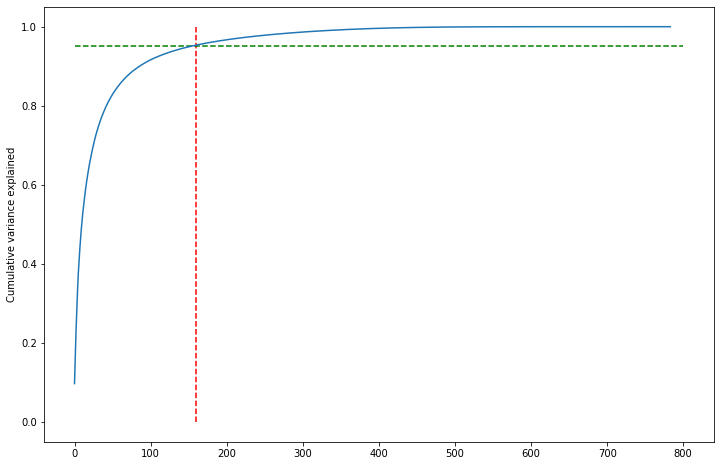

In [22]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=160, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=800, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [23]:
pca_final = IncrementalPCA(n_components=100)

In [24]:
df_train_pca = pca_final.fit_transform(X_train)

In [25]:
df_train_pca.shape

(29399, 100)

In [26]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [27]:
corrmat.shape

(100, 100)

In [28]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(12600, 100)

In [29]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [30]:
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
predictions = rfc.predict(df_test_pca)

In [32]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1242
           1       0.96      0.98      0.97      1424
           2       0.86      0.90      0.88      1199
           3       0.82      0.88      0.85      1296
           4       0.84      0.90      0.87      1204
           5       0.86      0.83      0.84      1178
           6       0.95      0.93      0.94      1250
           7       0.92      0.90      0.91      1284
           8       0.89      0.78      0.83      1236
           9       0.88      0.83      0.86      1287

    accuracy                           0.89     12600
   macro avg       0.89      0.89      0.89     12600
weighted avg       0.89      0.89      0.89     12600



In [34]:
print(confusion_matrix(y_test,predictions))

[[1190    0    4    6    7   10   13    2    7    3]
 [   1 1389    9    9    1    3    2    4    3    3]
 [  24    5 1084   26   11    4    4   11   23    7]
 [  13    5   48 1134    3   39    6   10   29    9]
 [   4    6   18    7 1085    1   14   11    7   51]
 [  26    6   10   77   26  976   12    3   25   17]
 [  25    3   17    7   10   18 1165    1    4    0]
 [   7   15   20   11   26    7    0 1159    6   33]
 [  18   12   36   79   19   71    9   10  966   16]
 [  10    6   11   21   97   11    3   48   12 1068]]


In [35]:
print(accuracy_score(y_test,predictions))

0.8901587301587301


In [36]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [37]:
scores = rf.cv_results_
scores=pd.DataFrame(scores)
scores.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

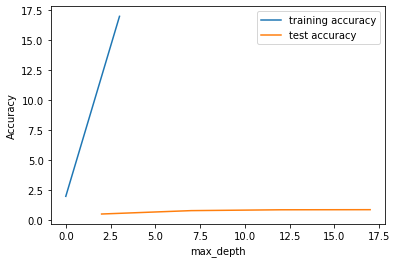

In [38]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores['param_max_depth'],  
         label="training accuracy")
plt.plot(scores['param_max_depth'], 
         scores['mean_test_score'], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [39]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [40]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,8.663893,0.189967,0.165657,0.002644,100,{'n_estimators': 100},0.820700,0.805371,0.813542,0.808916,0.810958,0.811898,0.005150,4
1,40.820549,0.350345,0.592075,0.057415,500,{'n_estimators': 500},0.823249,0.817270,0.823579,0.812489,0.821508,0.819620,0.004213,2
2,76.494396,6.591920,1.263329,0.130733,900,{'n_estimators': 900},0.824439,0.818290,0.824430,0.813340,0.817594,0.819620,0.004282,2
3,128.967105,1.713776,2.036659,0.092013,1300,{'n_estimators': 1300},0.827158,0.815230,0.825621,0.816913,0.820487,0.821082,0.004680,1


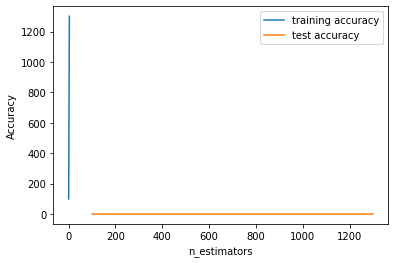

In [41]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
    
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()